# Graficos Comparativos

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Agrego el src")

/home/apernin/.dev/tda_2023Q1/tp1/src
Agrego el src


In [2]:
import time
import matplotlib.pyplot as plt
from main import create_test_dataset, new_heap_sort, merge_sort, perform_time_test

In [3]:
def test_and_plot(initial_h, initial_k, max_iter, func):
    h = initial_h
    ts_h = []
    k = initial_k
    ts_k = []
    
    ns = []
    
    n = 0
    
    while n < max_iter:
        # Fijo "n"
        ns.append(k)
        # Primero fijo h y pruebo k
        dataset = create_test_dataset(k=k, h=initial_h)
        _, t = perform_time_test(func, dataset)
        ts_k.append(t)
        
        k *= 2
        
        # Ahora fijo k y pruebo h
        dataset = create_test_dataset(k=initial_k, h=h)
        _, t = perform_time_test(func, dataset)
        ts_h.append(t)
        
        h *= 2
        
        n += 1
    
    plt.plot(ns, ts_k, label='Variacion-k')
    plt.plot(ns, ts_h, label='Variacion-h')
    plt.legend()
    plt.show()
    
    return ns, ts_k, ts_h

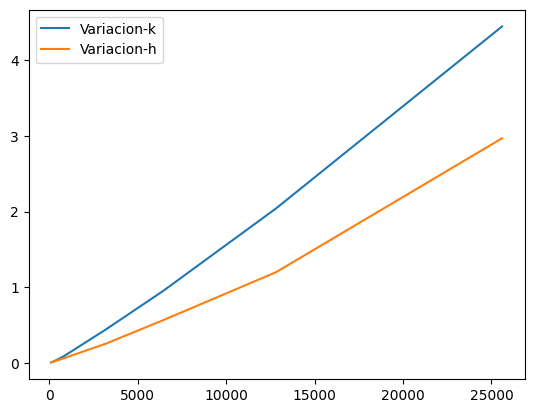

([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600],
 [0.010439452000014171,
  0.01784239900001694,
  0.039267905000002656,
  0.08865795799999887,
  0.20690749300001698,
  0.4445614960000057,
  0.9462769219999814,
  2.03717540400001,
  4.441261426000011],
 [0.008122227000001203,
  0.01538276799999494,
  0.031983932000002824,
  0.06261632400000394,
  0.12765896299998758,
  0.2569051350000109,
  0.5630880889999901,
  1.1968790020000029,
  2.9657522199999846])

In [11]:
test_and_plot(initial_h=100, initial_k=100, max_iter=9, func=merge_sort)

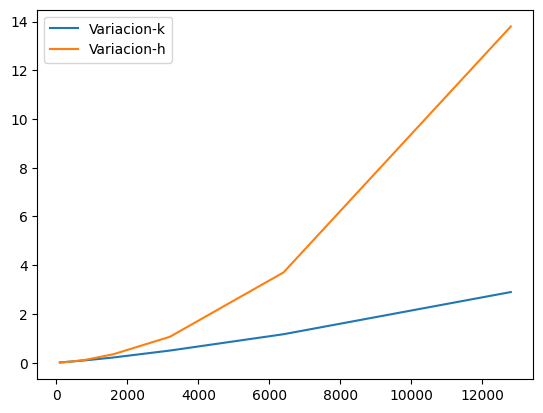

([100, 200, 400, 800, 1600, 3200, 6400, 12800],
 [0.009592609999998558,
  0.020297274999997228,
  0.04571103199999982,
  0.09398327699999953,
  0.2126160630000058,
  0.4983505790000038,
  1.1688265080000022,
  2.898973667],
 [0.008891049000006035,
  0.01916037699999862,
  0.043570230999996795,
  0.11232690500000331,
  0.3444271759999964,
  1.0645941339999965,
  3.7055921489999974,
  13.79669697300001])

In [7]:
test_and_plot(initial_h=100, initial_k=100, max_iter=8, func=new_heap_sort)